# **Build Linear Regression Model in Python**

Nesrin Özcan 

## **Load the Boston House Prices dataset**

In [1]:
from sklearn import datasets

In [2]:
boston = datasets.load_boston()

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

### **Description of the Boston House Prices dataset**

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### **Feature names**

In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### **Create X and Y data matrices**

In [15]:
X = boston.data
Y = boston.target

In [16]:
X.shape, Y.shape

((506, 13), (506,))

### **Split dataset to X and Y variables**

In [23]:
import pandas as pd
from pandas import DataFrame

In [30]:
bostondf = pd.DataFrame(boston.data, columns=boston.feature_names)
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### The target value MEDV is missing from the data so we create a new column of target values and add it to the dataframe. #

In [40]:
bostondf['MEDV']=boston.target

In [41]:
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Let's see if there is any missing value #

In [43]:
bostondf.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There is no missing value

## Exploratory Data Analysis

/home/edremit/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


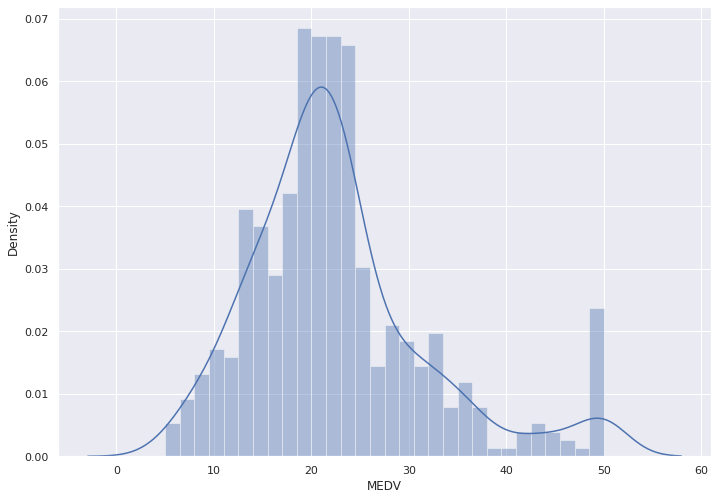

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bostondf['MEDV'], bins=30)
plt.show()

<AxesSubplot:>

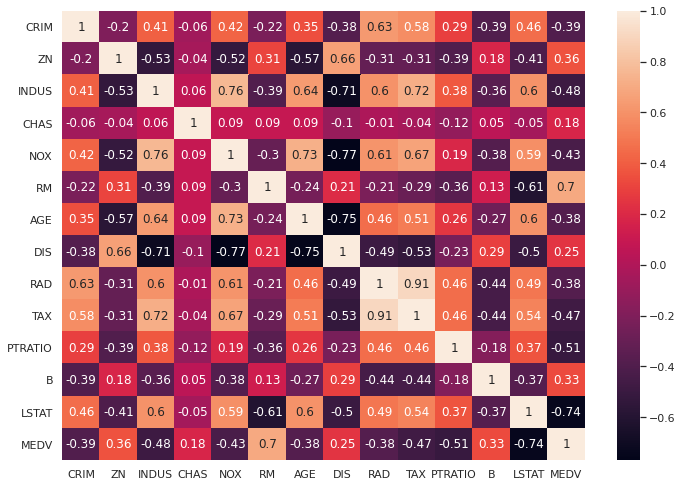

In [55]:
correlation_matrix = bostondf.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

We can see that our target value "MEDV" has a strong positive correlation with "RM", and a strong negative correlation with "LSTAT"

We can check if there is multi-colinearity. "DIS" and "NOX" has strog correlation, also "DIS" and "AGE" has strong correlation too

Based on the observations above, we can take "RM" and "LSTAT" as out features.

Text(0, 0.5, 'MEDV')

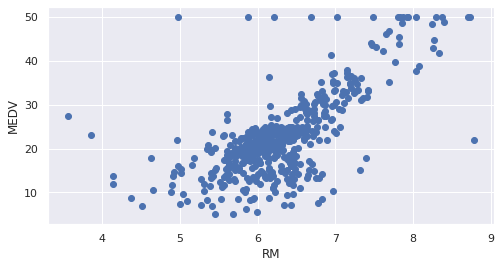

In [74]:
plt.figure(figsize=(8, 4))
plt.scatter(bostondf['RM'],bostondf['MEDV'], marker='o')
plt.xlabel('RM')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

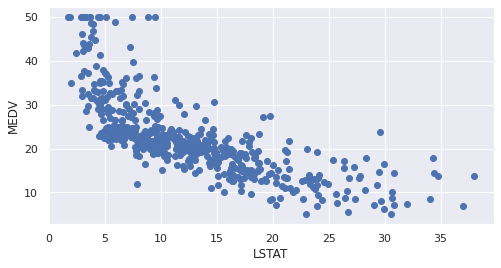

In [76]:
plt.figure(figsize=(8, 4))
plt.scatter(bostondf['LSTAT'],bostondf['MEDV'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

#### We can join two features 'LSTAT' and 'RM' in one dataframe

In [82]:
import numpy as np
X = pd.DataFrame(np.c_[bostondf['LSTAT'], bostondf['RM']], columns = ['LSTAT','RM'])
X

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


## **Data split**

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [85]:
X_train.shape, Y_train.shape

((354, 2), (354,))

In [86]:
X_test.shape, Y_test.shape

((152, 2), (152,))

## **Linear Regression Model**

In [87]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### **Build linear regression**

In [88]:
model = linear_model.LinearRegression()

In [89]:
model.fit(X_train, Y_train)

LinearRegression()

#### Apply trained model to make prediction (on test set)

In [90]:
Y_pred = model.predict(X_test)

# **Prediction results**

In [104]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-0.68807935  4.71963054]
Intercept: 1.5433247315591316
Mean squared error (MSE): 31.15
Coefficient of determination (R^2): 0.64


In [92]:
r2_score(Y_test, Y_pred)

0.6448941405023334

## **Scatter plots**

In [94]:
import seaborn as sns

In [95]:
Y_test

106    19.5
48     14.4
240    22.0
485    21.2
184    26.4
       ... 
73     23.4
12     21.7
491    13.6
288    22.3
422    20.8
Name: MEDV, Length: 152, dtype: float64

In [96]:
import numpy as np
np.array(Y_test)

array([19.5, 14.4, 22. , 21.2, 26.4, 12. , 24.7, 14.6, 27.5, 18.8, 13.1,
       29. , 13.4, 26.6, 14.5, 20.2, 32.4, 30.1, 10.5, 20.2, 24.6, 19.4,
       14.5, 34.6, 17.6, 18.6, 14.4, 25. , 18.5,  7.4, 20.8, 13.3, 31. ,
       11.7, 23.1, 10.9, 13.5, 22.1, 37.2,  8.1, 24.4, 27.5, 29.8, 23.9,
       24.3, 12.7, 23.8, 15. , 41.7, 11. , 14.5, 23.1, 17.8, 24.6, 13.3,
       23. , 27.5, 21.4, 25. , 36. , 20.9, 20. , 24.2, 34.7, 45.4, 21. ,
       19.1, 50. ,  5. , 50. , 23.3, 17.3, 10.8, 30.8, 26.4, 13.2, 25. ,
       10.9, 20.1, 23.4, 13.5, 13.1, 23.2, 33.2, 28.5, 15.2, 37.9,  8.3,
       23.9, 15.4, 33. , 21.9, 18.4, 43.5, 23.7, 19.9, 17.8, 18.2, 18.9,
       20.5, 33.3,  8.8, 19.3, 11.3, 18.8, 28.1, 18.1, 18.2, 29.8, 20. ,
       18.5, 31.2, 23.6, 18.3, 14.6, 24.8, 25. , 12.6, 13. , 33.8, 13.3,
       17.2, 29.4, 50. , 42.8, 13.6, 23.8, 30.1, 22. , 50. , 19.6, 18.4,
       43.8,  8.4, 17.8, 50. ,  7.2, 21.6, 23.5, 19.5, 14.3, 17.5, 22. ,
       28.6, 30.7, 20. , 20.9, 23.4, 21.7, 13.6, 22

In [97]:
Y_pred

array([16.24752788,  5.82488521, 26.26427357, 24.05375318, 18.37278496,
        9.43618849, 22.73039672,  4.47324154, 27.17703528, 17.1935977 ,
       15.35396776, 31.51274727, 21.39600738, 30.16491945, 15.29951957,
       19.24998136, 31.00966784, 29.08728939,  4.04016196, 25.20194194,
       28.39982565, 21.9053695 , 21.22836665, 31.318832  , 19.33922647,
       24.45827486,  1.55433994, 30.04519975, 15.2949091 ,  3.12981899,
       19.83845511, 14.04297577, 28.38316502, 20.40462738, 24.53550478,
       17.92859391, 16.31865851, 26.3221884 , 31.018426  ,  5.15820793,
       23.85147706, 26.81057191, 29.34758073, 25.07772091, 21.75531057,
       16.66744839, 26.15176213, 26.81019641, 39.19132858, 15.96452904,
       19.36581966, 27.92025268,  6.53292149, 27.0197725 , 18.99368922,
       23.61328635, 20.27202364, 21.92118309, 26.92071263, 30.79223736,
       23.27013298, 19.11478423, 27.20530069, 32.6809104 , 35.86365722,
       21.6351761 , 15.20541511, 24.32315197,  6.23112272, 30.51

#### Making the scatter plot

/home/edremit/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

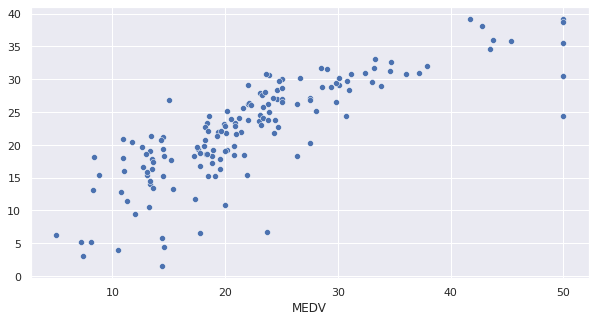

In [105]:
plt.figure(figsize=(10, 5))
sns.scatterplot(Y_test, Y_pred)

/home/edremit/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

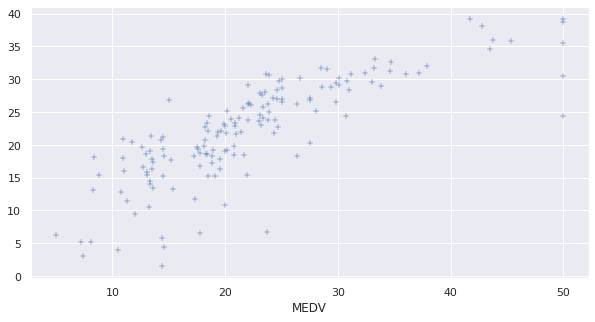

In [106]:
plt.figure(figsize=(10, 5))

sns.scatterplot(Y_test, Y_pred, marker="+")

/home/edremit/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

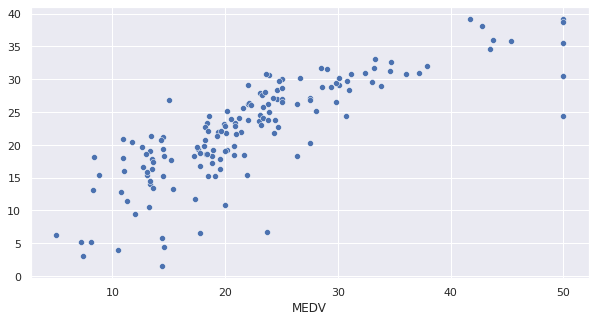

In [107]:
plt.figure(figsize=(10, 5))
sns.scatterplot(Y_test, Y_pred, alpha=1)